In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# removed this from wiglecsv: WigleWifi-1.4,appRelease=Kismet202208R1,model=Kismet,release=2022.08.R1,device=kismet,display=kismet,board=kismet,brand=kismet
csvd = pd.read_csv('/home/vlaghe/proj/warpi/data/buc2run/buc2runweli-20230114-14-53-28-1.wiglecsv')
# csvd = pd.read_csv('/path/to/your/file.wiglecsv')
#csvd.describe()  # summarry of data
#csvd.AuthMode.unique() # get uniq vals 4 one column
#csvd.drop_duplicates(subset='MAC') # drop duplicates based on col
csvd.sample(10)  # show 10 random sameples

,MAC,SSID,AuthMode,FirstSeen,Channel,RSSI,CurrentLatitude,CurrentLongitude,AltitudeMeters,AccuracyMeters,Type
9602,24:DF:A7:D7:56:8B,Air Conditioner-d7568b,[ESS],2023-01-14 15:08:48,6,-79,44.435762,26.103335,80.4,0,WIFI
17587,88:DC:96:77:83:20,NaN,[ESS],2023-01-14 15:26:54,1,-69,44.431267,26.067411,78.3,0,WIFI
26986,34:20:03:D1:15:CE,70mai_M300_15ce,[WPA-PSK-CCMP+TKIP] [WPA2-PSK-CCMP+TKIP][ESS],2023-01-14 16:23:27,6,-77,44.429251,26.052108,189.3,0,WIFI
21417,BE:7A:BF:88:3D:8C,AndroidAP1757,[WPA2-PSK-CCMP][ESS],2023-01-14 14:53:58,6,-67,44.429143,26.053493,93.6,0,WIFI
20279,77:F3:70:2A:F2:27,77:F3:70:2A:F2:27,Misc [LE],2023-01-14 15:36:02,0,0,44.428747,26.051888,86.2,0,BLE
25637,41:60:5B:8C:AB:54,41:60:5B:8C:AB:54,Misc [LE],2023-01-14 16:24:40,0,0,44.428534,26.052599,112.2,0,BLE
5854,F6:39:09:59:EE:6B,DIRECT-6B-HP Laser 107w,[WPA2-PSK-CCMP][ESS],2023-01-14 15:04:40,1,-71,44.441035,26.117399,111.5,0,WIFI
20390,CE:10:6F:A8:BD:E6,NaN,[ESS],2023-01-14 15:36:18,13,-37,44.428710,26.051760,89.7,0,WIFI
13458,38:81:D7:1A:35:1A,lime-931303299613,Misc [LE],2023-01-14 15:17:06,0,0,44.439080,26.097095,94.9,0,BLE
24403,CE:18:1D:10:1D:61,CE:18:1D:10:1D:61,Misc [LE],2023-01-14 16:19:34,0,0,44.428717,26.053387,90.9,0,BLE


## 📊 Some Stats 
Simple statistics about our data:
- Most Used SSIDs
- Open VS Hidden SSIDs
- Frequently Used Channels
- WiFi Security Protocols *(Open, WPA[1-3], Mixed)*

### Most Used SSIDs
I wanted to take a look @ the most common names when it comes to choosing SSIDs

From the perspective of an attacker / WiFi assessment this data can be quite fruitful, given that you can map the most used SSIDs in an area & use that to lunch further attacks for initail access *(e.g rogue AP, phising)* 

> **NOTE**: this is calculated from all of my dataset => the frequency @ which SSID names are counted are directly correlated with the GPS coords => if I stayed more in 1 place, the SSIDs in that area will show more times than others 

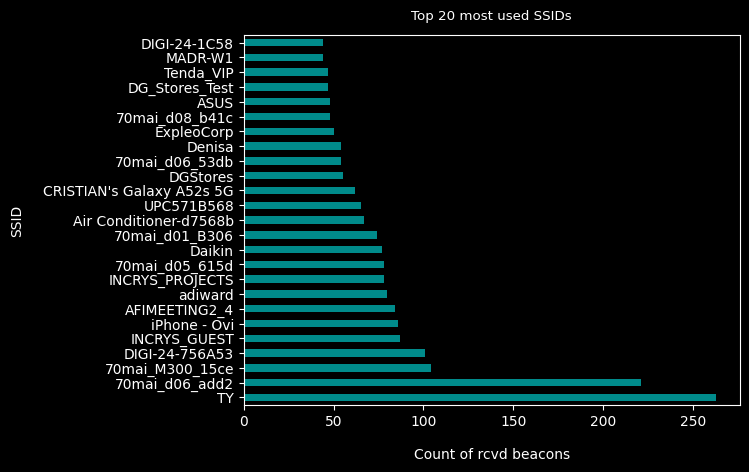

In [7]:
# Filter out MAC addresses from SSIDs
#   && get counts of unique names
regex = r"^([0-9A-Fa-f]{2}[:-]){5}([0-9A-Fa-f]{2})$" 
SSIDs = csvd[csvd.SSID.str.match(regex)==False].SSID
counts = SSIDs.value_counts()

# drop the first 2 columns (my phone hotspot & car camera)
counts = counts.iloc[2:]    
# counts.head(10) # | counts.index

TOP = 25    # change me to your liking 

# Style plot
plt.style.use('dark_background')
counts[:TOP].plot(kind='barh', color='darkcyan')
sns.set(font_scale=0.8)
plt.ylabel("SSID", labelpad=14)
plt.xlabel("Count of rcvd beacons", labelpad=14)
plt.title("Top 20 most used SSIDs", y=1.02);

# Want sorting?
# sort alphabetically : .sort_index(ascending=True)
# sort by value       : .sort_values(ascending=False)
# get % count         : .value_counts(normalize=True)

# total unique SSIDs: csvd.SSID.nunique()
# uniq_ssids = csvd.SSID.unique()

### 🔢 Frequently Used Channels

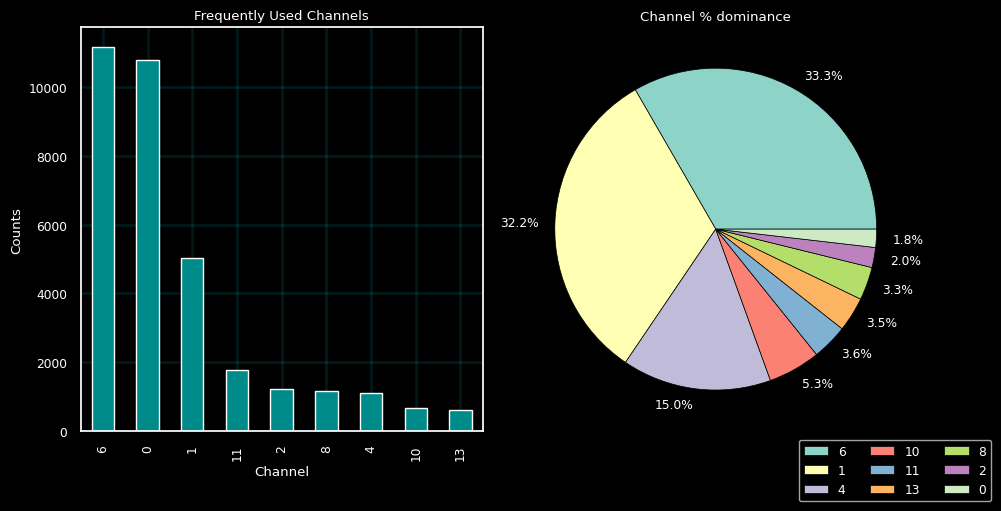

In [9]:
uniq_channels = csvd.Channel.unique()
counts = csvd.Channel.value_counts()
percs  = csvd.Channel.value_counts(normalize=True).mul(100).round(1)
# create a new df: channels = pd.concat([counts, percs], axis=1, keys=['count', 'perc'])

plt.figure(figsize=(10,5))

## Freq used channs
plt.subplot(1, 2, 1)
plt.title("Frequently Used Channels");
plt.style.use('dark_background')
plt.ylabel("Counts")
plt.xlabel("Channel")
plt.grid(visible=True, color='aqua', alpha=0.1, linestyle='-', linewidth=2)
counts.plot(kind='bar', color='darkcyan')
# or 1 liner -?
# csvd.Channel.value_counts().plot(kind='bar', color='darkcyan') 

## Channel % dominance
plt.subplot(1, 2, 2)
plt.title("Channel % dominance");
plt.pie(
    counts, labels=percs.astype(str) + '%', 
    labeldistance=1.1, 
    wedgeprops = {'linewidth' : 0.5, 'edgecolor' : 'black'}
)
plt.legend(uniq_channels, bbox_to_anchor=(1.2, -0.1), ncol=3, loc='right')
plt.tight_layout()

### 🔐 WiFi AP Encryption Distribution

2595 4425
{'Open': 4425, 'WPA': 84, 'WPA2': 13032, 'WPA3': 149, 'WPA | WPA2': 5313}


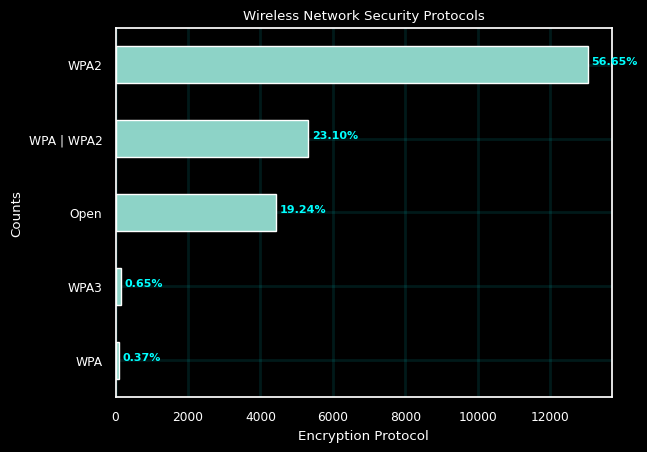

In [10]:
# Open = [ESS] and [WPS][ESS]
# WEP  = [WEP][ESS]
# WPA  = [WPA-PSK-CCMP][ESS] 
# WPA2 = [WPA2-PSK-CCMP][WPS][ESS] 
#        [WPA2-PSK-CCMP][ESS]
#        [WPA2-EAP-CCMP+TKIP][ESS]
# WPA3 = [WPA3-PSK-CCMP][ESS]
# Mixed Mode = [WPA-PSK-CCMP+TKIP][WPA2-PSK-CCMP+TKIP][WPS][ESS]
#              [WPA-PSK-CCMP+TKIP][WPA2-PSK-CCMP+TKIP][ESS]
#              [WPA-EAP-CCMP+TKIP][WPA2-EAP-CCMP+TKIP][ESS]

# Filter networks based on encryption protocols
#    NOTE: this feels retarded
bluetooth = csvd[csvd.AuthMode.str.match("Misc")]
open_nets = csvd.query("AuthMode == '[ESS]'")
uniq_open_ssids = open_nets.SSID.unique()

wpa_nets  = csvd[csvd.AuthMode.str.match("^\[WPA-[^\s]*\]\[ESS\]$")]
wpa2_nets = csvd[csvd.AuthMode.str.match("\[WPA2-")]
wpa3_nets = csvd[csvd.AuthMode.str.match("\[WPA3-")]
wpa_nd_wpa2 = csvd[csvd.AuthMode.str.contains("(?=.*WPA)+\s(?=.*WPA2)")]
print(len(open_nets.drop_duplicates(subset='MAC')), len(open_nets))

# Security Type Comparison
# create a dict & df from data
data = {
    'Open': len(open_nets),
    'WPA': len(wpa_nets),
    'WPA2': len(wpa2_nets),
    'WPA3': len(wpa3_nets),
    'WPA | WPA2': len(wpa_nd_wpa2)
}
print(data)
df = pd.DataFrame.from_dict(data, orient='index', columns=['Count']).sort_values(by='Count')
df['Percentage'] = df['Count'] / df['Count'].sum()*100

# plot & style
ax = df['Count'].plot(kind='barh')
plt.title('Wireless Network Security Protocols')
plt.xlabel('Encryption Protocol')
plt.ylabel('Counts')
plt.grid(visible=True, color='aqua', alpha=0.1, linestyle='-', linewidth=2)

# add % as bar labels
for i in range(len(df)):
    ax.text(
        df.loc[df.index[i],'Count'] + 100, i, f'{df.loc[df.index[i],"Percentage"]:.2f}%',
        color="cyan", fontweight='bold', fontsize=8
    )
plt.show()

### 🕵 Open VS Hidden Nets

Some routers don't actively shout *(i.e broadcast)* their SSID because the hidden network WiFi option has been turned on in the AP settings. In the past, activating this option used to be a popular security mechanism to make your device invisible to other's, thus enabling only users who know it exists to connect. 

As it turns out, [decloaking hidden networks](https://www.bengrewell.com/2018/02/11/decloaking_hidden_wireless/) became quite trivial, therefore making this option useless. 

**How is this possible ?**
- APs & routers with wireless capabilities continuously send wireless [management beacon packets](https://en.wikipedia.org/wiki/Beacon_frame) which enable clients to know of their existance in order to connect
- if the hidden option is set => the SSID will be missing in those management beacon packets signaling that there's an available WiFi net, but its SSID is hidden
- since kismet enables [monitor mode](https://en.wikipedia.org/wiki/Monitor_mode), we can detect the hidden networks but we can't capture the SSID. Or can we?

**Finding hidden network SSIDs**
- when a client device connects to a hidden net *(can force it with [de-auth attacks](https://x4bx54.medium.com/use-802-11w-or-wpa3-to-prevent-de-authentication-attacks-in-your-wi-fi-network-4ce63ab20033))*
- when a client device asks if a SSID is available
    - remember that client devices do not only *"listen"* to nearby networks, but also request connection to previously saved ones. Thus, revealing the SSID
- wireshark filter to monitor all non-beacon packets to & from a specifc AP: `(wlan.bssid == <the AP MAC>) && !(wlan.fc.type_subtype == 0x08)`

#### Data Pre-Processing
- generated `.json` from `.kismet` sqlite db with: 
```bash
kismetdb_dump_device --in Kismet-12345.kismet --out my_output.json -s
```
- used `find_hidden.py` util script to create the csv from the prev generated json:
```bash
# Will only grab WiFi APs: MAC,Channel,Freq
# && adds a new Hidden column 
python find_hidden.py data/buc2run/buc2run.json > test_hidd.csv
```

> **Note**: there are multiple ways of doing this 

,Hidden,Count,Percentage
0,Open,4645,96.59%
1,Hidden,164,3.41%


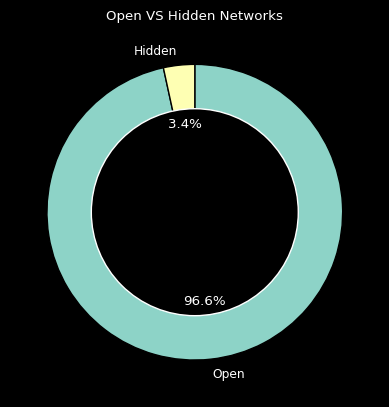

In [19]:
hidd_nets = pd.read_csv('/home/vlaghe/proj/warpi/data/buc2run/hidd_nets.csv', sep="-")
# display(hidd_nets.head())

grouped = hidd_nets.groupby("Hidden")["MAC"].size().reset_index(name="Count")
grouped["Percentage"] = (
    grouped["Count"] / grouped["Count"].sum()
).apply(lambda x: "{:.2%}".format(x))
grouped['Hidden'] = grouped['Hidden'].replace({0:'Open', 1:'Hidden'})
display(grouped)


# TODO: Find a better way to viz this
# Create a figure and axes
fig, ax = plt.subplots()

# Create the donut chart
ax.pie(
    grouped["Count"], labels=grouped["Hidden"], 
    autopct='%1.1f%%', startangle=90, counterclock=False, wedgeprops={"edgecolor":"black"}
)

# Add a title
plt.title('Open VS Hidden Networks')

# Add a circle to the center to make it a donut chart
centre_circle = plt.Circle((0,0),0.70,fc='black')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Display the chart
plt.show()